In [ ]:
# Install the openCV code:

# pip install opencv-python
# pip install opencv-contrib-python

# Each of these cells should be able to run independently

In [68]:
# Prove we can video capture and show BW images
# Pops up in new wondow.  Hit 'q' to quit
import numpy as np
import cv2

cap = cv2.VideoCapture(1)  # works on webcam plugged in
while(True):
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
print(imageSize)


(640, 480)


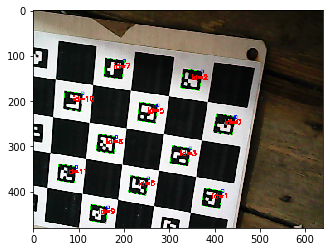

In [38]:
# Prove we can video capture code and detect aruco tags
# Hit 'q' to quit, and it shows last frame output
import numpy as np
import cv2
aruco_dict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_4X4_50)
parameters =  cv2.aruco.DetectorParameters_create()

cap = cv2.VideoCapture(1)  # works on webcam plugged in
while(True):
    ret, frame = cap.read()
    corners, ids, rejectedImgPoints = cv2.aruco.detectMarkers(frame, aruco_dict, parameters=parameters)
    bframe = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    cv2.aruco.drawDetectedMarkers(bframe, corners, ids)
    cv2.imshow('frame', bframe)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(bframe)

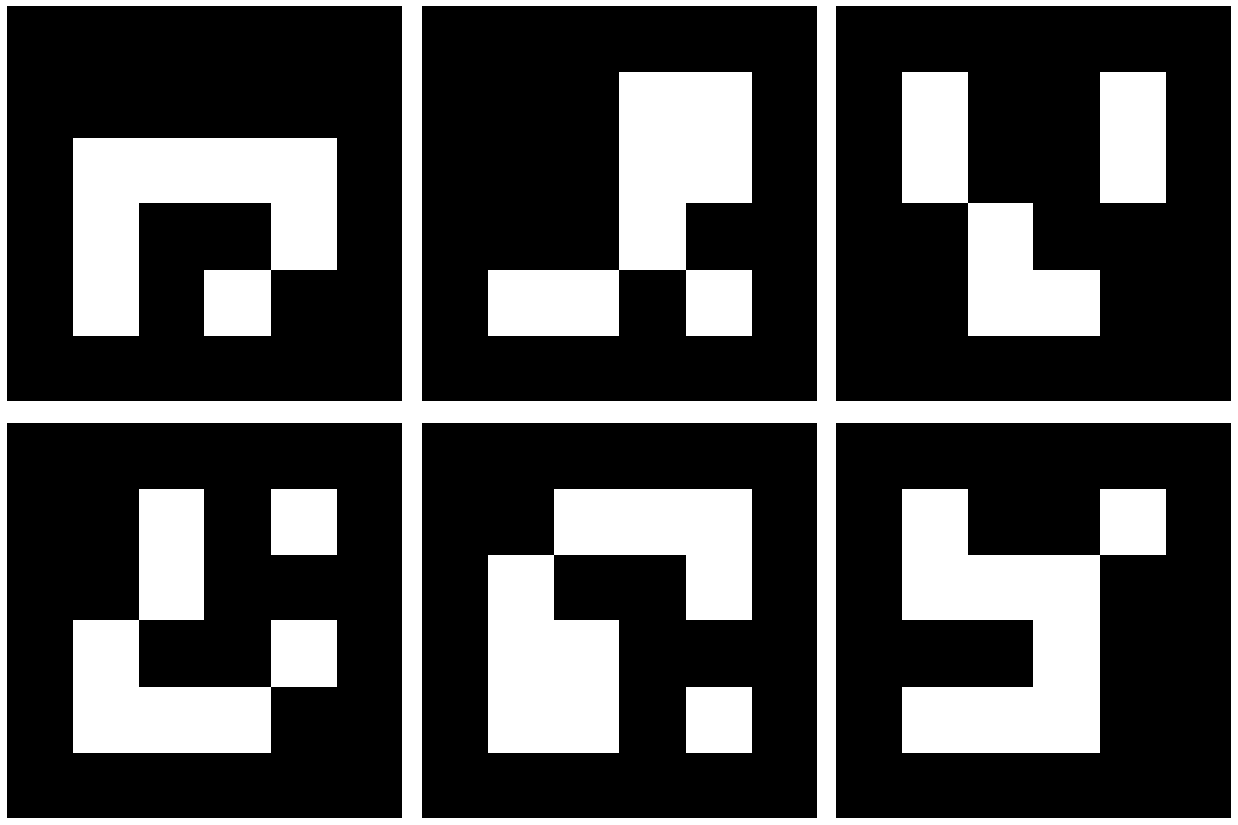

In [76]:
# Plot the charuco board and charuco tags in this cell please
import numpy as np
from cv2 import aruco
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
%matplotlib inline

aruco_dict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_4X4_50)
fig = plt.figure(figsize=(17,11.3))
nx = 3
ny = 2
for i in range(1, nx*ny+1):
    ax = fig.add_subplot(ny, nx, i)
    img = aruco.drawMarker(aruco_dict, i, 700)
    plt.imshow(img, cmap = mpl.cm.gray, interpolation = "nearest")
    ax.axis("off")
plt.subplots_adjust(0,0,1,1,0.05,0.05)

#plt.savefig("arucomarkers.png")
plt.show()


In [ ]:
# Do the camera calibration process from the charuco chessboards

import numpy as np
import cv2

aruco_dict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_4X4_50)
parameters =  cv2.aruco.DetectorParameters_create()
squaresX, squaresY, markersquareratio = 5, 7, 0.5
chesssquareLength = 276.0/7
charboard = cv2.aruco.CharucoBoard_create(squaresX, squaresY, chesssquareLength, chesssquareLength*markersquareratio, aruco_dict)
winSize, zeroZone, criteria = (5, 5), (-1, -1), (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_COUNT, 30, 0.1)

charucoCornersIds = [ ]
cap = cv2.VideoCapture(1)  # works on webcam plugged in
imageSize = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
while(True):
    ret, frame = cap.read()
    markerCorners, markerIds, rejectedMarkers = cv2.aruco.detectMarkers(frame, aruco_dict)
    bframe = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    if markerCorners:
        frameg = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        #for corner in markerCorners:  # optional loop
        #    cv2.cornerSubPix(frameg, corner, winSize, zeroZone, criteria)
        retval, charucoCorners, charucoIds = cv2.aruco.interpolateCornersCharuco(markerCorners, markerIds, frameg, charboard)
        cv2.aruco.drawDetectedCornersCharuco(bframe, charucoCorners, charucoIds)
        if retval >= 10:
            charucoCornersIds.append((charucoCorners, charucoIds))
    cv2.imshow('frame', bframe)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(frame)
print("charucoCornersIds recorded", len(charucoCornersIds))

In [65]:
print("charucoCornersIds recorded", len(charucoCornersIds))

charucoCornersIds recorded 127


In [72]:
# This one is a continuation of the one above using charucoCornersIds
import time
imageSize = (640, 480)

subcharucoCornersIds = charucoCornersIds[::3]
allCorners = [ charucoCorners  for (charucoCorners, charucoIds) in subcharucoCornersIds ]
allIds = [ charucoIds  for (charucoCorners, charucoIds) in subcharucoCornersIds ]

t0 = time.time()
cameraMatrixInit = np.array([[ 1000.,    0., imageSize[0]/2.],
                             [    0., 1000., imageSize[1]/2.],
                             [    0.,    0.,           1.]])

distCoeffsInit = np.zeros((5,1))
flags = (cv2.CALIB_USE_INTRINSIC_GUESS + cv2.CALIB_RATIONAL_MODEL + cv2.CALIB_FIX_ASPECT_RATIO)
#flags = (cv2.CALIB_RATIONAL_MODEL)
(ret, cameraMatrix, distCoeffs,
    rotation_vectors, translation_vectors,
    stdDeviationsIntrinsics, stdDeviationsExtrinsics,
    perViewErrors) = cv2.aruco.calibrateCameraCharucoExtended(
                      charucoCorners=allCorners,
                      charucoIds=allIds,
                      board=charboard,
                      imageSize=imageSize,
                      cameraMatrix=cameraMatrixInit,
                      distCoeffs=distCoeffsInit,
                      flags=flags,
                      criteria=(cv2.TERM_CRITERIA_EPS & cv2.TERM_CRITERIA_COUNT, 10000, 1e-9))

t1 = time.time()
print("Time taken to calculate", int(t1-t0), "seconds\n")
print("imageSize = %s" % repr(imageSize))
print("cameraMatrix = np.\\\n%s" % repr(cameraMatrix))
print("distCoeffs = np.%s" % repr(distCoeffs.T[:,:5]))


Time taken to calculate 25 seconds

cameraMatrix = np.\
array([[1.46536470e+03, 0.00000000e+00, 2.41959708e+02],
       [0.00000000e+00, 1.46536470e+03, 3.98210895e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])
distCoeffs = np.array([[ 1.24767578e-01,  1.05001101e+01,  3.51748275e-02,
        -7.35526444e-03,  1.24203812e+03]])


In [ ]:
# Now we have the camera calibration, we can use it to plot the orientation
# of each Aruco tag

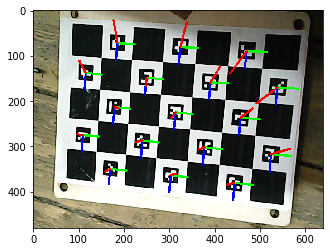

In [75]:
import numpy as np
import cv2

imageSize = (640, 480)
cameraMatrix = np.\
array([[1.46536470e+03, 0.00000000e+00, 2.41959708e+02],
       [0.00000000e+00, 1.46536470e+03, 3.98210895e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])
distCoeffs = np.array([[ 1.24767578e-01,  1.05001101e+01,  3.51748275e-02,
        -7.35526444e-03,  1.24203812e+03]])
markerLength = 0.08610  # dimension in metres

aruco_dict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_4X4_50)
parameters =  cv2.aruco.DetectorParameters_create()
cap = cv2.VideoCapture(1)  # works on webcam plugged in
while(True):
    ret, frame = cap.read()
    corners, ids, rejectedImgPoints = cv2.aruco.detectMarkers(frame, aruco_dict, parameters=parameters)
    crvecs, ctvecs, _objPoints = cv2.aruco.estimatePoseSingleMarkers(corners, markerLength, cameraMatrix, distCoeffs)
    bframe = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    if ids is not None:
        for i in range(len(ids)):
            cv2.aruco.drawAxis(bframe, cameraMatrix, distCoeffs, crvecs[i], ctvecs[i], 0.1)
    cv2.imshow('frame', bframe)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
        
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(bframe)
        

In [46]:
cap.release()
cv2.destroyAllWindows()
